# Instructions
This is the Qiskit Advocate Test notebook. You will need to write and execute Qiskit code to answer several questions in this test. Once you have answered all the questions, you will need to submit the test for grading. You will be informed via email of you application outcome shortly after the end of application period.

**This notebook only runs correctly using Jupyter notebook. It is currently incompatible with Jupyter lab.**

In order to use this notebook, please follow these instructions.
1. Run the cell below to install any dependencies of this notebook including `qiskit`, `metakernel`, `portalocker` and `matplotlib`. Make sure you install Qiskit version `0.19.6` for the test.
1. Fill out your name in the `Personal Information` section below and run that cell. Make sure you get the output `Done`.
1. To see the questions for each section, run the line that looks like `%activity questions/section`. You can go back and forth and select different answers. 
1. There are **30 questions** throughout this test. Your answers to each question are stored as soon as you select a choice, and are not erased if you re-start a section of questions.
1. You can change your answers as many times as you'd like. All answers will be stored but **only the last answer will be graded**.
1. To submit your answers, run the `Submit` cell. This will generate a file named `answers_yourname.zip`. Please attach this file to the advocate application form.

The primary reference materials for the test are [Qiskit Tutorials](https://qiskit.org/documentation/tutorials/circuits/index.html) and [Qiskit Documentation](https://qiskit.org/documentation/). In addtion, [Qiskit Textbook](https://qiskit.org/textbook/preface.html), [Coding with Qiskit](https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY), [Qiskit Live Circuit Sessions](https://www.youtube.com/playlist?list=PLOFEBzvs-VvrRlVz7wqaqmaMZj_ZK2Afe) and [1 Minute Qiskit](https://www.youtube.com/playlist?list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e) are also good source of reference. If you have any questions please reach out in the `qiskit-advocates-help` channel on Qiskit Slack.

In [1]:
# install dependencies
!pip install --upgrade qiskit==0.19.6 
!pip install --upgrade metakernel
!pip install --upgrade portalocker
!pip install --upgrade matplotlib

Requirement already up-to-date: qiskit==0.19.6 in /opt/anaconda3/lib/python3.7/site-packages (0.19.6)


Requirement already up-to-date: metakernel in /opt/anaconda3/lib/python3.7/site-packages (0.24.4)
Requirement already up-to-date: portalocker in /opt/anaconda3/lib/python3.7/site-packages (2.0.0)
Requirement already up-to-date: matplotlib in /opt/anaconda3/lib/python3.7/site-packages (3.3.1)


In [2]:
from metakernel import register_ipython_magics
register_ipython_magics()

from IPython.display import clear_output
clear_output()

import qiskit
version_info = qiskit.__qiskit_version__
print("You are now running Qiskit with the following version numbers")
print(version_info)

You are now running Qiskit with the following version numbers
{'qiskit-terra': '0.14.2', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.3', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.3', 'qiskit': '0.19.6'}


# Personal Information

In [3]:
your_name = "Shovit Bhari" # insert your name here between the quotes

import os
try:
    assert(your_name != '')
    answer_dir = 'answers/'
    if not os.path.isdir(answer_dir):
        os.mkdir(answer_dir)
    open(answer_dir + 'taker_info.txt', 'w').write('name = {}\nversion_info = {}'.format(your_name, version_info))
    print('Done')
except:
    print("Error. Please reach out in the #qiskit-advocates-help on Qiskit Slack.")  

Done


---
# Space for trying out answers
You can add any new cells in this notebook to try to figure out the answers for questions. 

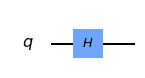

In [4]:
# example
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

In [5]:
import numpy as np

from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from IPython.display import display, Math, Latex
from qiskit import *
from math import pi
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city, plot_state_qsphere


%matplotlib inline


---
# Contents <a name="toc"></a>

1. [Circuits (5 questions)](#circuits)
1. [Advanced Circuits (5 questions)](#advanced_circuits)
1. [Running on Real Devices (2 questions)](#real_devices)
1. [Pulse (5 questions)](#pulse)
1. [High-Performance Simulators (7 questions)](#simulators)
1. [Quantum System Error Analysis  (3 questions)](#error_analysis)
1. [Optimization (3 questions)](#optimization)

# Running on Real Devices (2 questions)<a name="real_devices"></a>
Reference: 
1. [Qiskit Tutorials - The IBM Account](https://github.com/Qiskit/qiskit-tutorials/blob/master/legacy_tutorials/terra/3_the_ibmq_account.ipynb)
1. [Qiskit Documentation - IBM Quantum Provider](https://qiskit.org/documentation/apidoc/ibmq_provider.html)
1. [1 Minute Qiskit - How can I retrieve an old job from IBM Quantum?](https://www.youtube.com/watch?v=09-Qsge_qqo&list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e&index=6)

In [6]:
from qiskit import IBMQ
provider = IBMQ.enable_account('7d28db10d507b3db6a8514f8c537bd32e465a8474bbc5788a2047a4dd1ba850da89df7d28b32a2cd85432f5ae975d2469261a2630d842960895264ff27eab744')

In [7]:
IBMQ.get_provider()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
from qiskit.providers.ibmq import least_busy
backend=least_busy(provider.backends())
print(backend)

ibmq_qasm_simulator


In [9]:
from qiskit.providers.ibmq import least_busy
backend= least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5))
print(backend)

ibmq_qasm_simulator


In [10]:
provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
and not x.configuration().simulator
and x.status().operational==True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [11]:
from qiskit import IBMQ, assemble, transpile
from qiskit.circuit.random import random_circuit

provider = IBMQ.load_account()
backend = provider.backends.ibmq_vigo
qx = random_circuit(n_qubits=5, depth=4)
qobj = assemble(transpile(qx, backend=backend), backend=backend)
job = backend.run(qobj)

ibmqfactory.load_account:WARNING:2020-08-14 09:43:23,291: Credentials are already in use. The existing account in the session will be replaced.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: random_circuit keyword argument n_qubits is deprecated and replaced with num_qubits.
  


In [20]:
backend.jobs()[0]

IBMQJob(_api=<qiskit.providers.ibmq.api.clients.account.AccountClient object at 0x7fca61c37490>, _api_status='COMPLETED', _backend=<IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, _backend_info={'id': '5d2c7d5ff148e40073c3abe6', 'name': 'ibmq_vigo'}, _cancelled=False, _creation_date=datetime.datetime(2020, 8, 14, 16, 43, 28, 597000, tzinfo=tzutc()), _error=None, _job_error_msg=None, _job_id='5f36bf30f1bf7c00135f4e36', _kind=<ApiJobKind.QOBJECT_STORAGE: 'q-object-external-storage'>, _name=None, _qobj=None, _queue_info=None, _result=None, _run_mode='fairshare', _status=<JobStatus.DONE: 'job has successfully run'>, _tags=[], _time_per_step=None, _use_object_storage=True, end_date='2020-08-14T16:45:18.054Z', hub_info={'hub': {'name': 'ibm-q'}, 'group': {'name': 'open'}, 'project': {'name': 'main'}}, share_level='none', user_id='5e828cb1dd83d80011fbf69f')

In [21]:
backend.jobs()[-1]

IBMQJob(_api=<qiskit.providers.ibmq.api.clients.account.AccountClient object at 0x7fca61c37490>, _api_status='COMPLETED', _backend=<IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, _backend_info={'id': '5d2c7d5ff148e40073c3abe6', 'name': 'ibmq_vigo'}, _cancelled=False, _creation_date=datetime.datetime(2020, 8, 10, 2, 28, 42, 544000, tzinfo=tzutc()), _error=None, _job_error_msg=None, _job_id='5f30b0db252dfd001a348a96', _kind=<ApiJobKind.QOBJECT_STORAGE: 'q-object-external-storage'>, _name=None, _qobj=None, _queue_info=None, _result=None, _run_mode='fairshare', _status=<JobStatus.DONE: 'job has successfully run'>, _tags=[], _time_per_step=None, _use_object_storage=True, end_date='2020-08-10T02:29:34.892Z', hub_info={'hub': {'name': 'ibm-q'}, 'group': {'name': 'open'}, 'project': {'name': 'main'}}, share_level='none', user_id='5e828cb1dd83d80011fbf69f')

In [22]:
backend.retrieve_job()[0]

TypeError: retrieve_job() missing 1 required positional argument: 'job_id'

In [23]:
backend.retrieve_job()[-1]

TypeError: retrieve_job() missing 1 required positional argument: 'job_id'

In [19]:
%activity questions/real_devices